# Temel Bileşen Analizi ( Principal Component Analysis - PCA)

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir. Diğer bir ifade ile: küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

**Dikkat!** Bir mülakatta principal component yöntemi nedir, ne yapar?

Temel bileşen analizi bir boyut indirgeme yaklaşımıdır. Veri setinin boyutunu, küçük miktarda bir bilgi kaybını göze alarak indirgeme işlemidir.

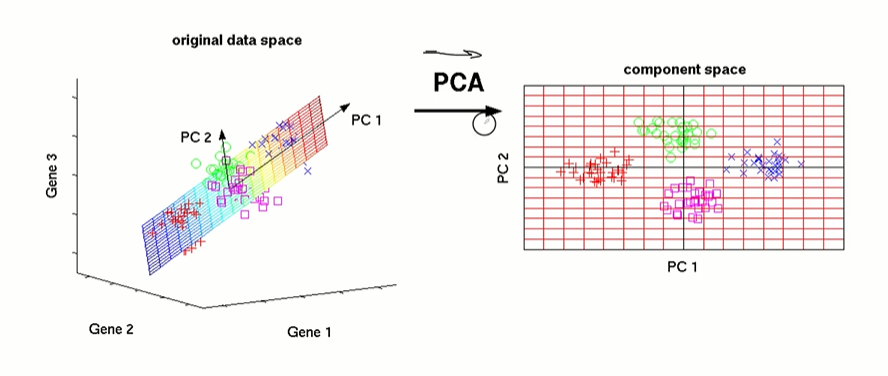

Temel bileşen analizi bir araçtır, birçok farklı amaçla birçok farklı kaygıyla kullanılıyor olabilir. Örneğin görüntü işleme problemlerinde gürültüyü azaltmak için, çok boyutlu verilerde verileri görselleştirebilmek için vs. 

**Dikkat!** Temel bileşen analizi veri setini bağımsız değişkenlerin doğrusal kombinasyonları ile ifade edilen bileşenlere indirger. Dolayısıyla bu bileşenler arasında korelasyon yoktur. Bu bileşenler korelasyonsuzdur. 


Özetle, PCA bir boyut indirgeme yaklaşımıdır. Belirli miktarda bir bilgi kaybını göze alarak boyut indirgemesi yapar. Peki teknik olarak detaylarda bu bileşenleri nasıl çıkarır?

Değişken gruplarının varyanslarını ifade eden öz değerler ve veri setindeki değişkenleri gruplandırır. Yani varyansa dayalı, öz değerlere dayalı bir gruplama yapılmaktadır.

## Principal Component Analysis

In [295]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.simplefilter(action='ignore', category=Warning)

In [296]:
df = pd.read_csv("../datasets/hitters.csv")

In [297]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Bu veri seti beyzbol oyuncularının özelliklerine göre maaşlarını göstermektedir. Şu an unsupervised learning konusunda olduğumuzdan dolayı maaş değişkenini ve kategorik değişkenleri veri setimizden çıkaracağız.

In [298]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [299]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [300]:
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


Sayısal değişkenlerimizi elde ettik. Şimdi df içerisinde diğer değişkenleri uçurarak sadece sayısal değişkenlerin içeride kalmasını sağlayalım.

In [301]:
df = df[num_cols]

Veri setinde eksik değer varsa hepsini sildirelim.

In [302]:
df.dropna(inplace=True)

In [303]:
df.shape

(322, 16)

16 tane değişkenimiz bulunuyor. Amacımız çok değişkenli verinin daha az değişken ile ifade edilmesi. Bu yöntem de standartlaştırma ihtiyacı duyduğumuz bir yöntem. Bunda dolayı standartscaler yöntemini kullanacağız.

In [304]:
df = StandardScaler().fit_transform(df)

Şimdi model nesnemizi oluşturalım.

In [305]:
pca = PCA()

In [306]:
pca_fit = pca.fit_transform(df)

*Bu bileşenlerin başarısı nasıl değerlendirelecek? *

Bileşenlerin başarısı bileşenlerin açıkladığı varyans oranlarına göre belirlenmektedir.

**Dikkat!** PCA'in temel amacı, veri setindeki değişkenliğin, veri setindeki bilginin daha az sayıdaki bileşen ile açıklanması idi. Bunu yaparken belirli miktarda bir bilgi kaybını göze alıyordu. Bilgi=varyans'tır. Dolayısıyla bu bileşenlerin başarısını değerlendirebileceğimiz metrik, açıkladıkları varyans oranıdır.

In [307]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

Yukarıdaki bileşenlerin açıkladıkları varyans oranlarıdır. Elimizde varyans oranları varsa, elimizde bilgi oranları da var demektir. 

In [308]:
np.cumsum(pca.explained_variance_ratio_) # kümülatif varyanslar - bu bileşenler bir araya geldiklerinde toplam ne kadar açıklama oranına sahip

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

Yukarıdaki sonuç incelendiğinde 1. bileşen %46, 2. bileşen 1. bileşen ile beraber toplandığında %72, diye diye ilerliyor. 5. bileşene geldiğimizde verinin içinde bulunan bilginin, varyansın %91'inin açıklandığını görebiliriz. 

Yukardaki sonuçla örnek olarak şöyle bir karar verebiliriz; biz zaten 3 bileşen kullandığımızda mevcut değişkenliğin %82'sini açıklayabiliyoruz. O zaman bu veri setini 3 bileşene indirgeyebiliriz.

Bu bileşen sayısına nasıl karar verebiliriz? (Elbow Yöntemi)

### Optimum Bileşen Sayısı

Elbow yöntemi ile en keskin geçisin, en kayda değer değişikliğin nerede olduğunu inceleyebiliyorduk.

In [309]:
pca = PCA().fit(df)

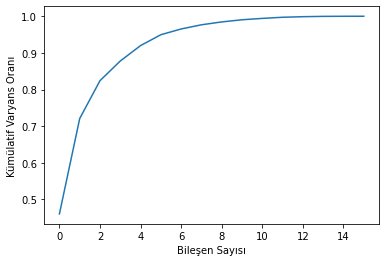

In [310]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

Grafik incelendiğinde 2-3 gibi bir değer tercih edilebilir. Çünkü burada zaten 3 bileşen zaten %80'nin üzerini açıklamış. 

Burada 3 sayısın en optimum nokta olarak seçtiğimizi düşünelim. Bu noktaya göre final bir model kuracağız.

### Final PCA'in Oluşturulması

In [311]:
pca = PCA(n_components=3)

In [312]:
pca_fit = pca.fit_transform(df)

In [313]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [314]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

## BONUS: Principal Component Regression

Diyelim ki, hitters veri seti doğrusal bir model ile modellenmek istiyor ve değişkenler arasında çoklu doğrusal bağlantı problemi var. Bu, çoklu doğrusal regresyon problemlerinde sağlanması gereken varsayımlardandır. Değişkenler arasında yüksek korelasyon olduğunda bu çeşitli problemlere sebep olur. Bu durumu istemiyor oluruz.

In [315]:
df = pd.read_csv("../datasets/hitters.csv")

In [316]:
df.shape

(322, 20)

Temel bileşen analizinde hitters veri setindeki 20 tane değişkeni 3 tane değişkene düşürdük. *Ama peki şimdi ne olacak?* 3 bileşen ile veri setinin %82'sini açıklayabiliyoruz demiştik. *Peki bunu nerede ve nasıl kullanacağız?* İşte bu noktada temel bileşen analizinin aslında bir tahmin yapmadığı, sadece çeşitli problemleri gidermeye yarayan bir amaç olduğunu gözlemlemiş olduk.

Şimdi bunu bir problem üzerinde nasıl kullanabiliriz onun örneğini yapacağız. Yukarıda söylendiği gibi hitters veri setindeki değişkeler arasında çoklu doğrusal bağlantı probleminin olduğunu düşünelim. Bunun önüne geçmek amaçlı PCA yöntemini kullanıp değişken sayısını düşürebiliriz.

Bu yöntemi uygulamak için bağımlı değişkenimizi ve kategorik değişkenleri veri setinden çıkarmıştık. Şimdi kategorik değişkenleri de başka bir yerde tutmak istiyoruz.

In [317]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [318]:
others = [col for col in df.columns if col not in num_cols]

In [319]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [320]:
others

['League', 'Division', 'Salary', 'NewLeague']

Şimdi yukarıda PCA ile boyut düşürdüğümüz pca_fit nesnesini kullanıp daha rahat okunması açısından bir df oluşturacağız.

In [321]:
pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [322]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


Bileşenleri indirgeme işlemi tamamlandığına göre bu iki veri setini bir araya getirelim.

In [323]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"]), df[others]], axis=1)

In [324]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


16 tane sayısal değişkenimiz vardı artık 3 tane oldu. Artık o 16 değişkenin taşıdığı bilginin %82'si bu 3 değişkence taşınıyor. Burada değişkenler arasında çoklu doğrusal bağlantı problemi olduğunu, yani bağımsız değişkenlerin birbirleriyle yüksek kolerasyonlu olması problemi olduğunu varsaymıştık. Bu şekilde oluşturduğumuz bu 3 bileşen korelasyonsuzdur. Yani korelasyon problemini kırmış olduk.

Şu anda bileşen indirgemesi tamamlandı. Hızlı bir şekilde model kuralım.

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [326]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [327]:
for col in ["NewLeague", "League", "Division"]:
    label_encoder(final_df, col)

In [328]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,0,0,NaN,0
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1


In [329]:
final_df.dropna(inplace=True)

In [330]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [331]:
lin_reg = LinearRegression()

In [332]:
rmse = np.mean(np.sqrt(-cross_val_score(lin_reg, X, y, cv=5, scoring="neg_mean_squared_error")))

In [333]:
rmse

345.60211063519677

In [334]:
y.mean()

535.9258821292775

In [335]:
cart = DecisionTreeRegressor()

In [336]:
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

In [337]:
rmse

377.62623015253286

CART yöntemini kullandığımız için bu yönteme bir hiperparametre optimizasyonu yapmamız gerekir.

In [338]:
cart_params = {"max_depth": range(1, 11),
              "min_samples_split": range(2, 20)}

In [339]:
from sklearn.model_selection import GridSearchCV

In [340]:
#GridSearchCV
cart_best_grid = GridSearchCV(cart,
                             cart_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [341]:
cart_best_grid.best_params_

{'max_depth': 3, 'min_samples_split': 19}

En optimum değerler ile final modeli kuralım.

In [342]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17)

In [343]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))

In [344]:
rmse

330.19641093391044

 **Doktora mülakat sorusu**

*Elimizde bir veri seti var, ama veri setinde label yok. Fakat biz bu veri seti ile sınıflandırma problemi çözmek istiyoruz. Ne yapabiliriz?*

Önce unsupervised bir yöntem kullanırız. Oradan çıkaracağımız clusterlara label muhamelesi yaparız. Bu oluşturduğumuz clustersları ana veri setine ekleyip bu veri setini bir sınıflandırıcıya sokup bir model kurarız. Böylece yeni bir gözlem birimi geldiğinde bunu artık sınıflandırabiliriz. 

## BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

### Breast Cancer

In [378]:
df = pd.read_csv("../datasets/breast_cancer.csv")

In [379]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Amacımız, bu çok değişkenli veriyi iki boyutlu eksen üzerinde görselleştirmek istiyor olalım.

In [380]:
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

Öncelikle veri setini 2 boyuta indirgememiz lazım. Daha sonra 2 boyuta indirgediğimiz veriyi görselleştirmemiz lazım.

In [348]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=["PC1", "PC2"])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

In [381]:
pca_df = create_pca_df(X, y)

In [382]:
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


Veri setini 2 bileşene indirgemiş olduk. Şimdi bu 2 bileşeni görselleştirmemiz lazım.

In [351]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)
    
    targets = list(dataframe[target].unique())
    colors = []
    
    while len(colors) != len(targets):
        colors.append(list(np.random.random_sample(3)))
    
    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], color=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

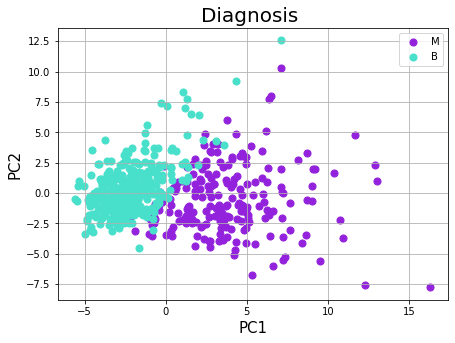

In [385]:
plot_pca(pca_df, "diagnosis")

30-32 değişkenli veri seti 2 boyuta indirgendi ve, 2 boyuta indirgendikten sonra bir sınıflandırma problemi için sınıfların dağılımları iki eksen üzerinde görselleştirildi.

### Iris

In [372]:
import seaborn as sns

In [373]:
df = sns.load_dataset("iris")

In [374]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [375]:
y = df["species"]
X = df.drop("species", axis=1)

Yukarıda oluşturmuş olduğumuz iki fonksiyonu burada da kullanacağız.

**Dikkat!** Bu iki fonksiyonu hemen hemen her problem için kullanabiliriz. Fakat dikkat edilmesi gereken nokta, fonksiyonlara vereceğimiz X değişkeninde sadece sayısal veriler olmalı! Yani burada hiçbir kategorik değişken olmaması gerekir!

In [376]:
pca_df = create_pca_df(X, y)

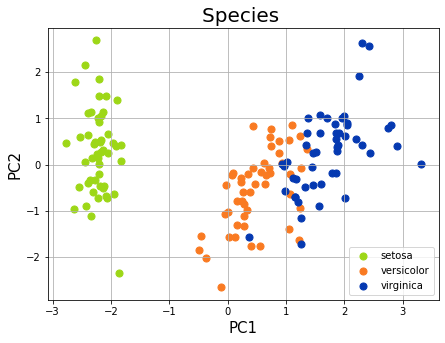

In [377]:
plot_pca(pca_df, "species")

### Diabetes

In [359]:
df = pd.read_csv("../datasets/diabetes.csv")

In [360]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [361]:
pca_df = create_pca_df(X, y)

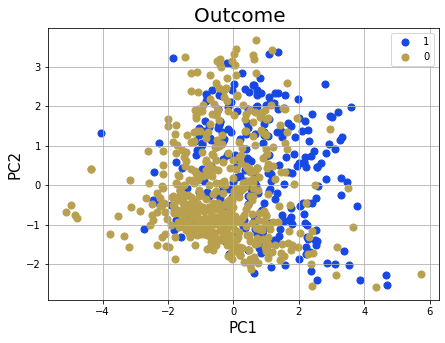

In [371]:
plot_pca(pca_df, "Outcome")